# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-10-25 00:00:19--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2025-10-25 00:00:19 (35.1 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





In [4]:
# Mostrar las primeras filas
df = pd.read_csv('Social_Network_Ads.csv')
display(df.head())

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Información general del dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


None

In [ ]:
display(df.describe())

## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

- UserID: Identificador único de cada usuario (no relevante para el modelo).
- Gender: Género del cliente, puede influir ligeramente en los patrones de compra.
- Age: Edad del cliente, variable importante porque puede reflejar hábitos de consumo.
- EstimatedSalary: Ingreso estimado, relevante ya que influye en la capacidad de compra.
- Purchased: Variable objetivo (0 = no compró, 1 = compró).

## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

Distribución de la variable Purchased:
Purchased
0    257
1    143
Name: count, dtype: int64


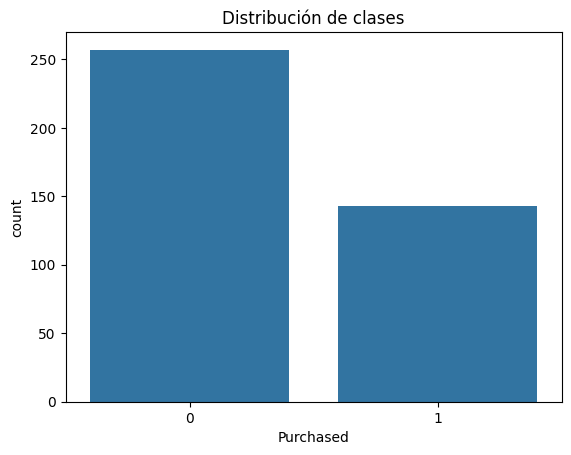

In [11]:
print("Distribución de la variable Purchased:")
print(df['Purchased'].value_counts())

# Visualización
sns.countplot(x='Purchased', data=df)
plt.title("Distribución de clases")
plt.show()

## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

La variable Purchased muestra un desequilibrio moderado ya que hay más personas que no compraron que las que sí lo hicieron. Esto puede hacer que el modelo aprenda a predecir principalmente la clase mayoritaria, afectando su capacidad para identificar correctamente a quienes sí compran.

Para evitarlo, se pueden usar estrategias como asignar pesos balanceados a las clases, aplicar técnicas de re-muestreo (por ejemplo, SMOTE para aumentar la clase minoritaria) o evaluar el modelo con métricas más adecuadas, como recall, precisión o F1-score, en lugar de fijarse solo en la exactitud.

## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?

Las variables Age y EstimatedSalary son relevantes porque ambas pueden influir directamente en la decisión de compra:

- Edad (Age): suele reflejar el momento de vida de una persona y sus hábitos de consumo. Por ejemplo, los más jóvenes pueden tener intereses o prioridades diferentes a los adultos, lo que afecta su probabilidad de compra.

- Salario estimado (EstimatedSalary): representa la capacidad económica. Las personas con mayores ingresos tienen más posibilidades de adquirir productos o servicios.

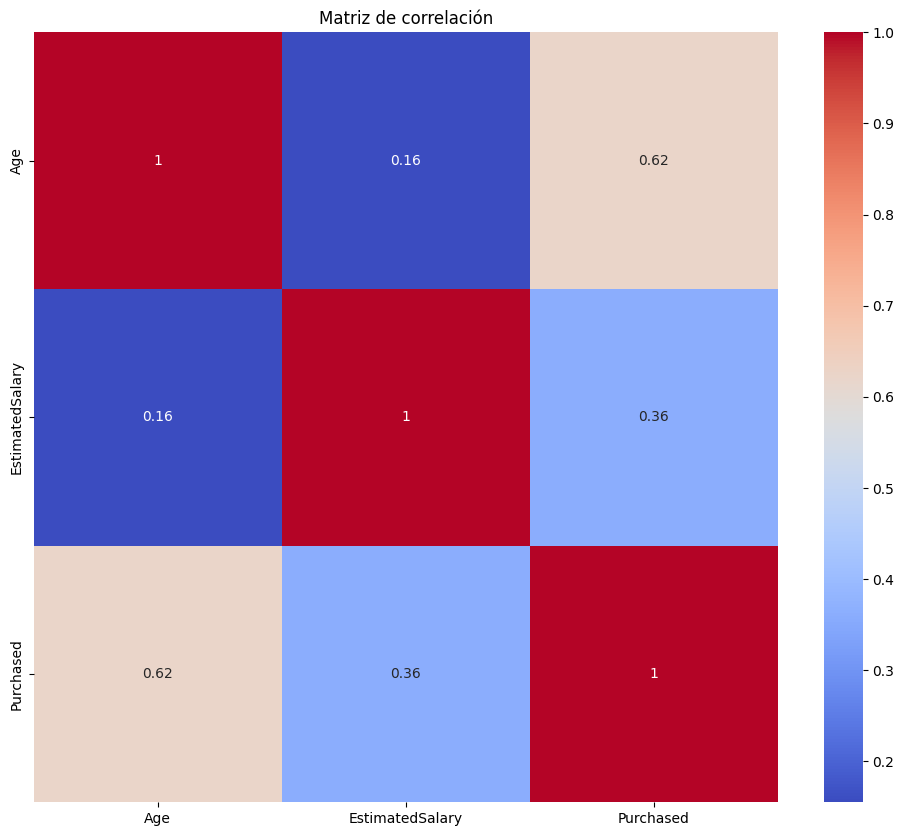

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df[['Age', 'EstimatedSalary', 'Purchased']].corr(), cmap='coolwarm', annot=True)
plt.title("Matriz de correlación")
plt.show()

## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

- Evita sesgos: el modelo entrena y se evalúa con una representación realista de los datos.

- Mejora la validez de la evaluación: las métricas reflejan mejor el desempeño real.

- Previene resultados engañosos: sin estratificación, el conjunto de prueba podría tener muy pocos ejemplos de la clase minoritaria y dar una evaluación poco confiable.

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Dividir en train y test con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

# Mostrar la distribución de clases en el conjunto de entrenamiento
print("Distribución de clases en entrenamiento (proporciones):")
print(y_train.value_counts(normalize=True))

Dimensiones del conjunto de entrenamiento: (300, 4)
Dimensiones del conjunto de prueba: (100, 4)
Distribución de clases en entrenamiento (proporciones):
Purchased
0    0.643333
1    0.356667
Name: proportion, dtype: float64


In [21]:
from imblearn.over_sampling import SMOTE

if y_train.value_counts(normalize=True).max() > 0.66:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Nueva distribución de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))
else:
    print("No se requiere SMOTE, la distribución de clases está balanceada.")

No se requiere SMOTE, la distribución de clases está balanceada.


## 9. Entrenamiento Inicial del Modelo de Árbol de Decisión

Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

**Pregunta:**
- ¿Qué implica entrenar un modelo sin restricciones de profundidad en términos de complejidad y riesgo de sobreajuste?

- El árbol se vuelve muy grande y aprende incluso los detalles y el ruido del conjunto de entrenamiento.
- El modelo tendrá un excelente rendimiento en los datos de entrenamiento, pero fallará al generalizar a nuevos datos, perdiendo precisión en el conjunto de

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_encoded, y_train)

# Regresión Logística
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train_encoded, y_train)

print("Modelos entrenados.")

Modelos entrenados.


## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

La matriz de confusión muestra cuántas predicciones acertó y en cuáles se equivocó el modelo para cada clase. En este caso:

En el Árbol de Decisión, se observa que:
- 58 personas fueron correctamente clasificadas como “no compró” (verdaderos negativos).
- 28 personas fueron correctamente clasificadas como “compró” (verdaderos positivos).
- 6 casos fueron falsos positivos (predijo que comprarían, pero no lo hicieron).
- 8 casos fueron falsos negativos (no predijo la compra, pero sí compraron).

En la Regresión Logística, el patrón es similar, pero tiene más falsos negativos (12), es decir, falló más en detectar compradores reales.

Reporte de Clasificación - Árbol de Decisión (Test):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.82      0.78      0.80        36

    accuracy                           0.86       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.86      0.86      0.86       100

Reporte de Clasificación - Regresión Logística (Test):
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        64
           1       0.83      0.67      0.74        36

    accuracy                           0.83       100
   macro avg       0.83      0.79      0.81       100
weighted avg       0.83      0.83      0.83       100



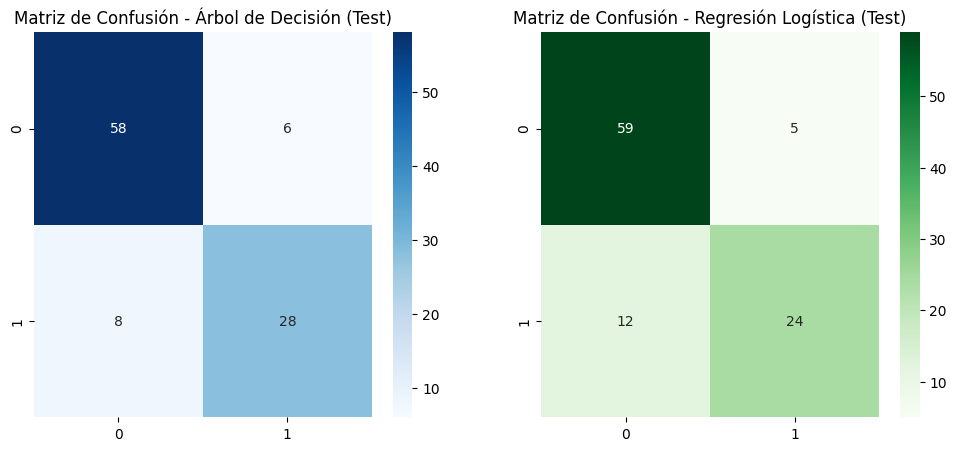

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       107

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Reporte de Clasificación - Regresión Logística (Train):
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       193
           1       0.84      0.71      0.77       107

    accuracy                           0.85       300
   macro avg       0.85      0.82      0.83       300
weighted avg       0.85      0.85      0.85       300



In [30]:
from sklearn.metrics import classification_report

## Evaluación en el conjunto de prueba
# Predicciones en test
y_pred_dt = dt_model.predict(X_test_encoded)
y_pred_lr = lr_model.predict(X_test_encoded)

print("Reporte de Clasificación - Árbol de Decisión (Test):")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificación - Regresión Logística (Test):")
print(classification_report(y_test, y_pred_lr))

# Matrices de Confusión
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title("Matriz de Confusión - Árbol de Decisión (Test)")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title("Matriz de Confusión - Regresión Logística (Test)")
plt.show()

## Evaluación en el conjunto de entrenamiento para detectar overfitting
y_pred_train_dt = dt_model.predict(X_train_encoded)
y_pred_train_lr = lr_model.predict(X_train_encoded)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_dt))

print("Reporte de Clasificación - Regresión Logística (Train):")
print(classification_report(y_train, y_pred_train_lr))

## 11. Visualización de la Curva ROC y Cálculo del AUC

Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

**Pregunta:**
- ¿Cómo interpretan la curva ROC y qué indica un valor de AUC alto o bajo?

La curva ROC muestra qué tan bien distingue el modelo entre las dos clases (compró vs. no compró) al variar el umbral de decisión.

- El eje X representa la tasa de falsos positivos (errores al predecir que alguien compró cuando no lo hizo).

- El eje Y muestra la tasa de verdaderos positivos (personas que realmente compraron y fueron correctamente detectadas).


En el gráfico, la Regresión Logística (AUC = 0.91) tiene mejor capacidad de discriminación que el Árbol de Decisión (AUC = 0.84).

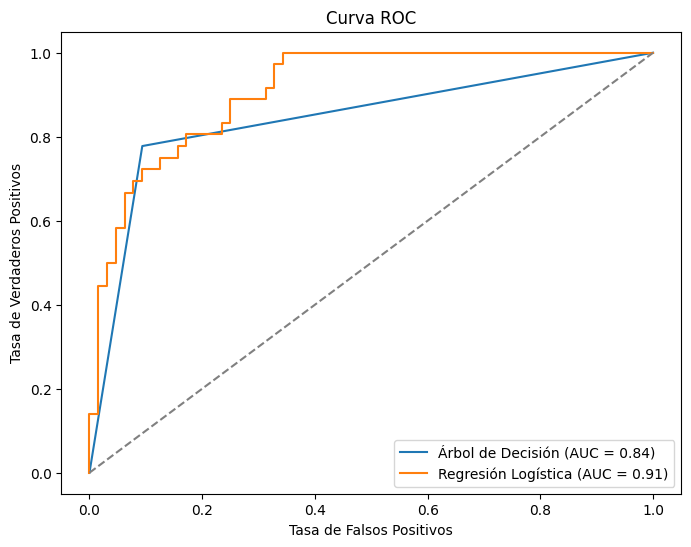

In [32]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades en test
y_prob_dt = dt_model.predict_proba(X_test_encoded)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test_encoded)[:, 1]

# Calcular ROC y AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_lr = auc(fpr_lr, tpr_lr)

# Graficar ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Árbol de Decisión (AUC = {auc_dt:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## 12. Visualización e Interpretación del Árbol de Decisión

Exporta y visualiza el árbol de decisión utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

**Preguntas:**
- ¿Cuál es la regla de decisión en el primer nodo?
- ¿Cómo se interpretan las ramas y las hojas en relación a las variables `Age` y `EstimatedSalary`?
- ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste?

1. Regla de decisión en el primer nodo:
- La primera condición es Age ≤ 44.5, lo que significa que el árbol separa los datos en dos grupos:

    - Si la edad es menor o igual a 44.5 años, sigue la rama izquierda.
    - Si la edad es mayor a 44.5 años, sigue la rama derecha.
2. Interpretación de ramas y hojas:
- Cada rama representa una decisión basada en una variable (por ejemplo, EstimatedSalary ≤ 89,500).
- Cada hoja muestra el resultado final: la clase predicha (0 = no compró, 1 = compró) y cuántos ejemplos de cada tipo contiene.
- En general, personas jóvenes o con salarios bajos tienden hacia la clase 0 (no compraron), mientras que mayores o con ingresos más altos se asocian más a la clase 1 (sí compraron).
3. Partes que podrían estar contribuyendo al sobreajuste:
Las ramas más profundas con muy pocos ejemplos (por ejemplo, nodos con samples = 1 o 2) indican decisiones demasiado específicas que el modelo aprendió del conjunto de entrenamiento, en lugar de patrones generales.


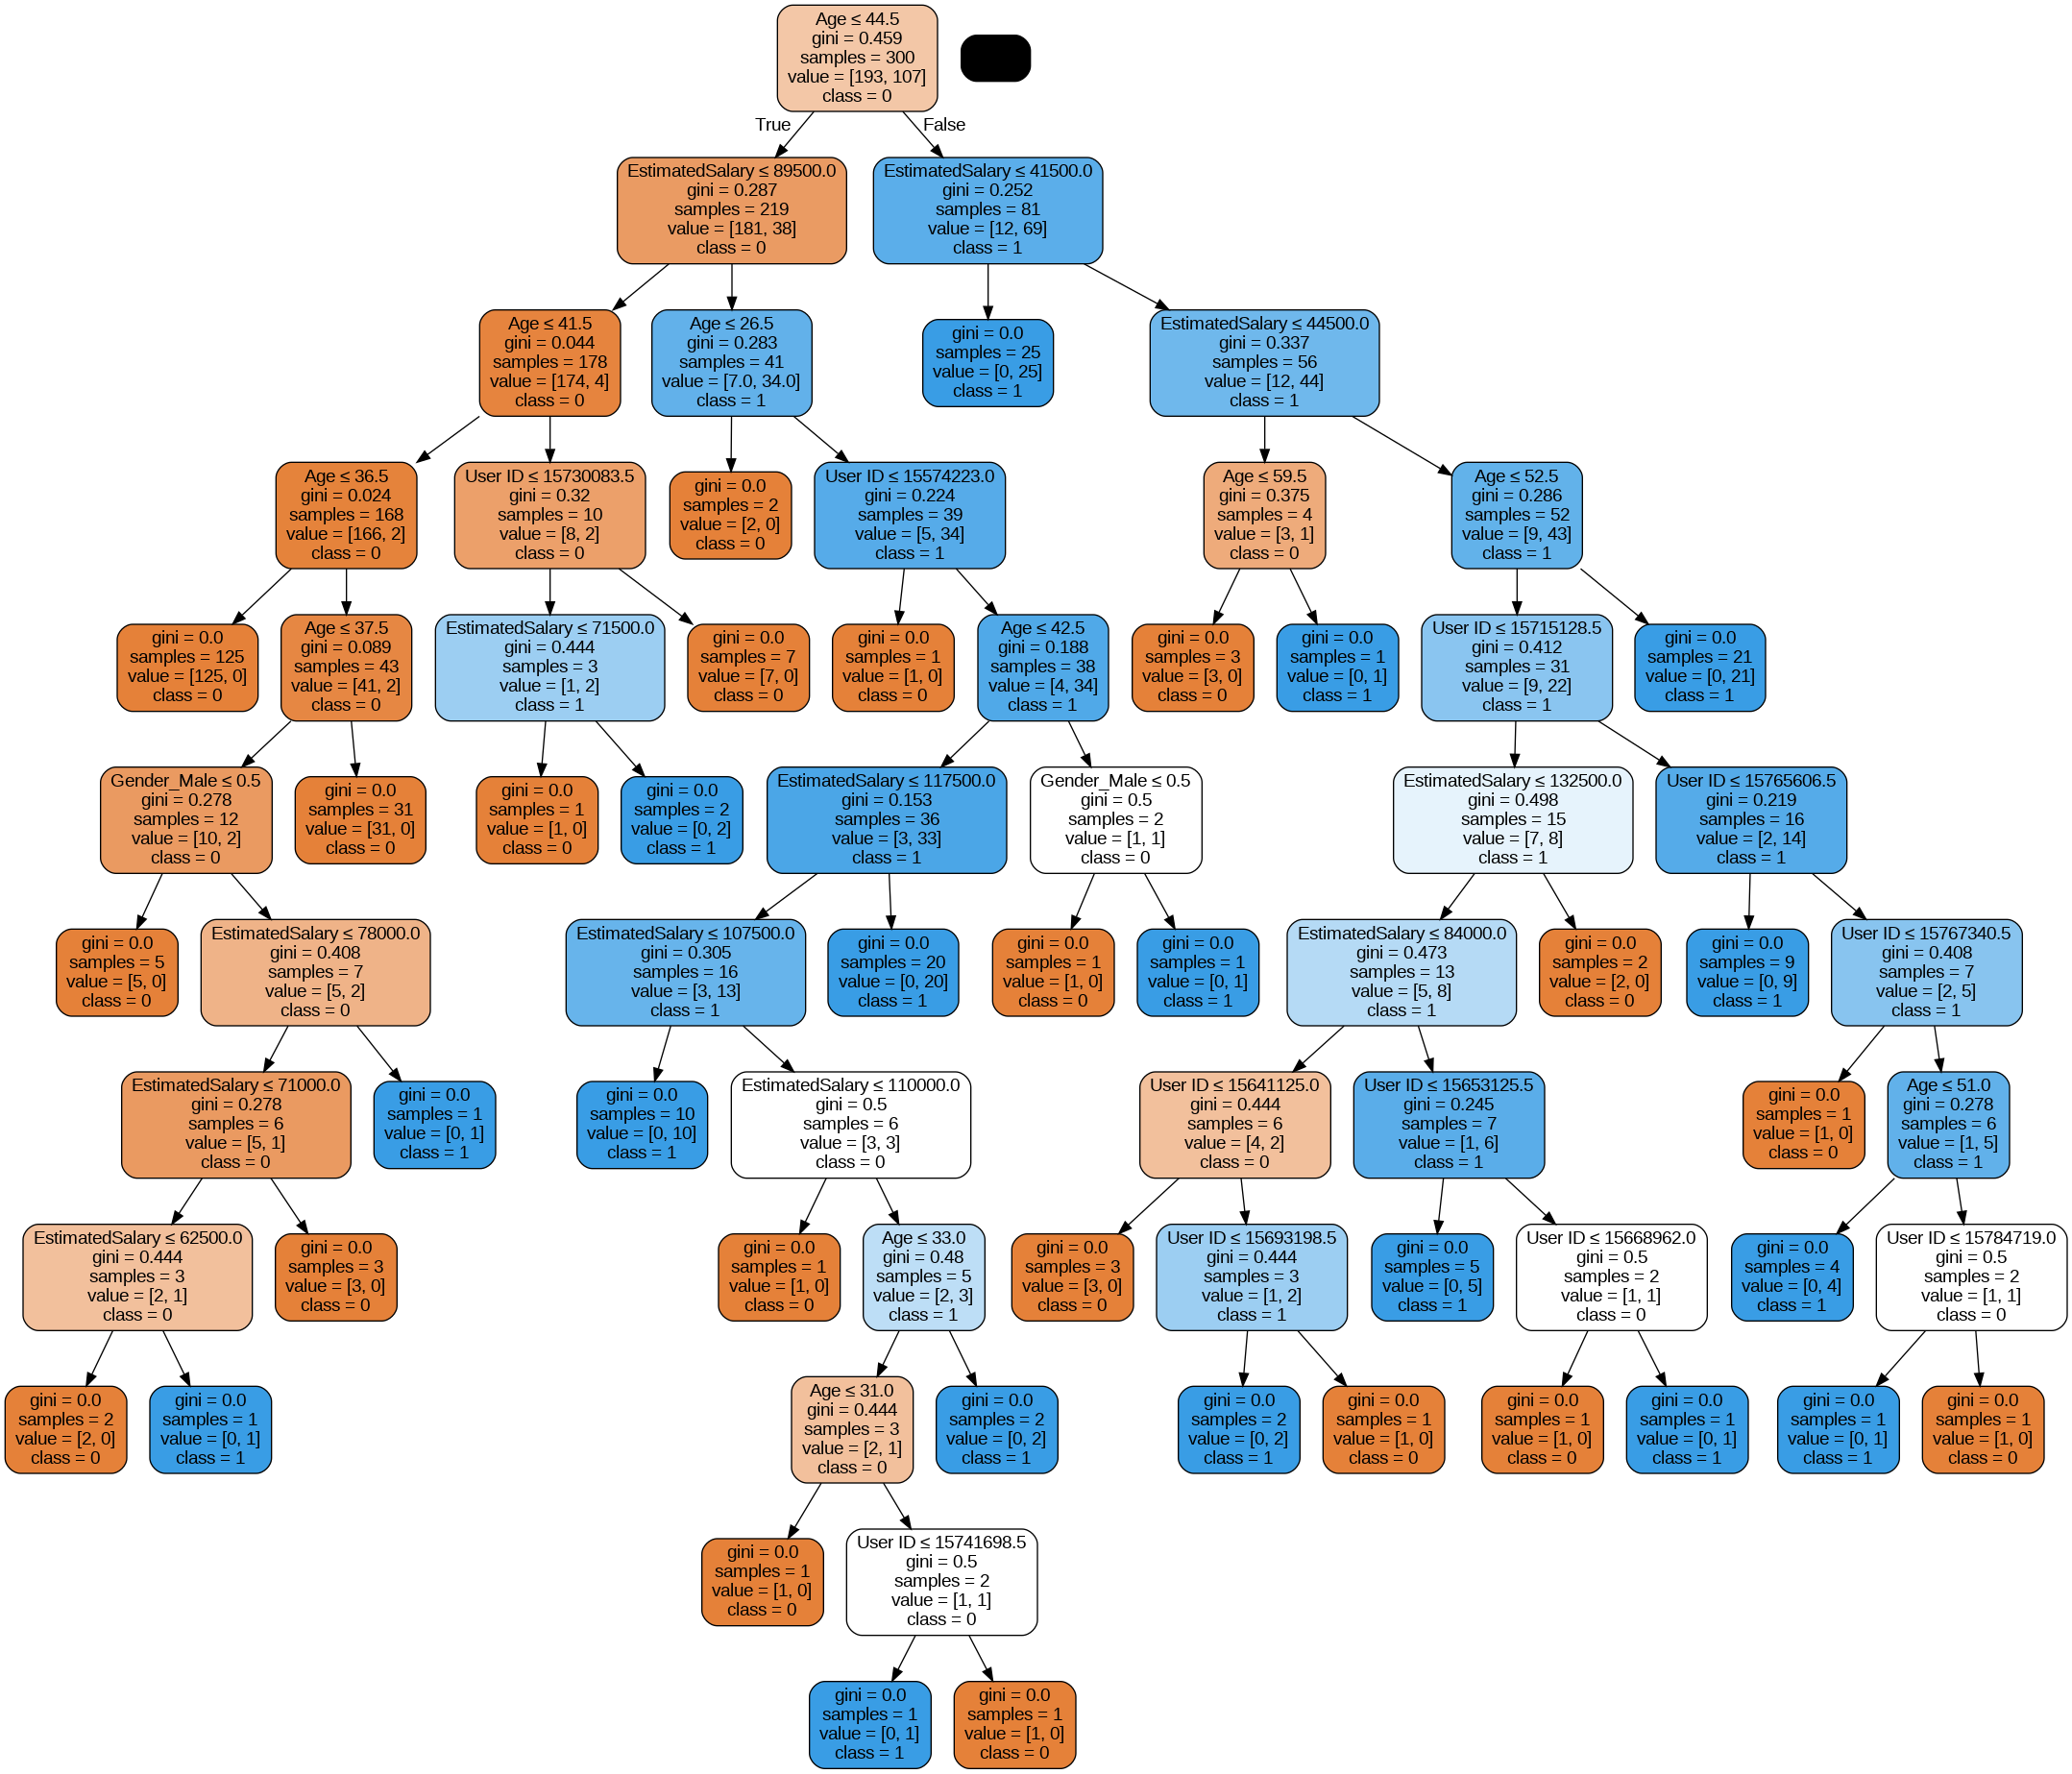

In [36]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

# Exportar el árbol a un archivo DOT
dot_data = export_graphviz(dt_model,
                           feature_names=X_train_encoded.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Crear el gráfico desde el archivo DOT
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostrar el gráfico (requiere GraphViz instalado en el sistema o en Colab)
Image(graph.create_png())

## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

Si, hay indicios de sobreajuste, ya que el árbol sin restricciones se ajusta demasiado al conjunto de entrenamiento y pierde capacidad de generalizar en prueba. Las métricas muestran mejor desempeño en entrenamiento que en prueba. Para mejorar, se recomienda limitar la profundidad del árbol, aumentar el mínimo de muestras por nodo o aplicar poda para reducir la complejidad y mejorar la generalización.

## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

Modelo de Árbol de Decisión ajustado entrenado (max_depth=5).

Métricas de evaluación para el Árbol de Decisión ajustado:
Exactitud: 0.8700
Precisión: 0.8108
Recall: 0.8333
F1-Score: 0.8219


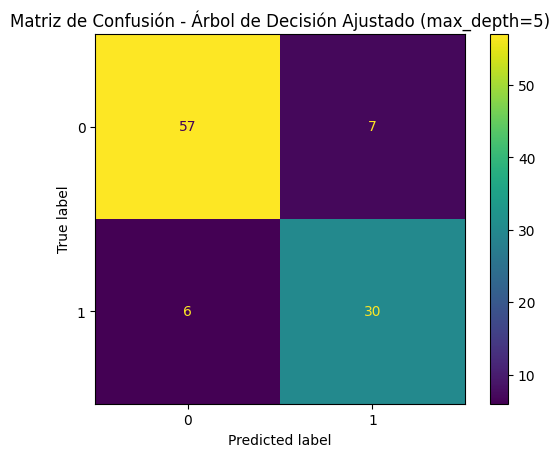

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Entrenar el modelo de árbol de decisión con profundidad limitada
arbol_ajustado = DecisionTreeClassifier(max_depth=5, random_state=42)
arbol_ajustado.fit(X_train_encoded, y_train)

print("Modelo de Árbol de Decisión ajustado entrenado (max_depth=5).")

# Predicciones en el conjunto de prueba con el modelo ajustado
y_pred_ajustado = arbol_ajustado.predict(X_test_encoded)

# Calcular métricas de evaluación para el modelo ajustado
accuracy_ajustado = accuracy_score(y_test, y_pred_ajustado)
precision_ajustado = precision_score(y_test, y_pred_ajustado)
recall_ajustado = recall_score(y_test, y_pred_ajustado)
f1_ajustado = f1_score(y_test, y_pred_ajustado)

print("\nMétricas de evaluación para el Árbol de Decisión ajustado:")
print(f"Exactitud: {accuracy_ajustado:.4f}")
print(f"Precisión: {precision_ajustado:.4f}")
print(f"Recall: {recall_ajustado:.4f}")
print(f"F1-Score: {f1_ajustado:.4f}")

# Matriz de Confusión para el modelo ajustado
cm_ajustado = confusion_matrix(y_test, y_pred_ajustado)
disp_ajustado = ConfusionMatrixDisplay(confusion_matrix=cm_ajustado, display_labels=arbol_ajustado.classes_)
disp_ajustado.plot()
plt.title("Matriz de Confusión - Árbol de Decisión Ajustado (max_depth=5)")
plt.show()

🔹 Desempeño en Entrenamiento:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       193
           1       0.90      0.97      0.93       107

    accuracy                           0.95       300
   macro avg       0.94      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

🔹 Desempeño en Prueba:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.81      0.83      0.82        36

    accuracy                           0.87       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.87      0.87       100

AUC Entrenamiento: 0.989
AUC Prueba: 0.911


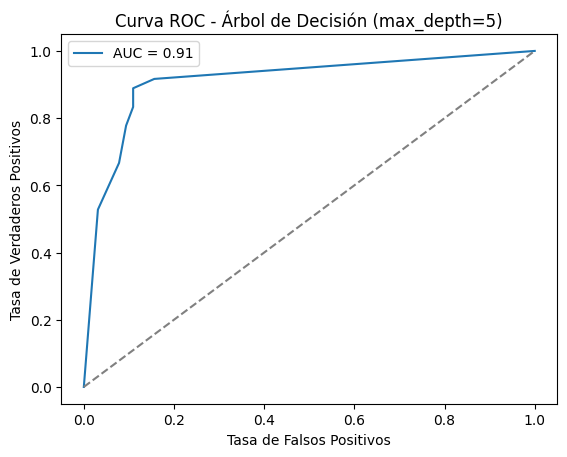

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Entrenar el árbol con profundidad máxima de 5
arbol_limited = DecisionTreeClassifier(max_depth=5, random_state=42)
arbol_limited.fit(X_train_encoded, y_train)

# Predicciones
y_pred_train = arbol_limited.predict(X_train_encoded)
y_pred_test = arbol_limited.predict(X_test_encoded)

# Evaluación del modelo
print("🔹 Desempeño en Entrenamiento:")
print(classification_report(y_train, y_pred_train))

print("🔹 Desempeño en Prueba:")
print(classification_report(y_test, y_pred_test))

# Calcular y mostrar el AUC
auc_train = roc_auc_score(y_train, arbol_limited.predict_proba(X_train_encoded)[:,1])
auc_test = roc_auc_score(y_test, arbol_limited.predict_proba(X_test_encoded)[:,1])
print(f"AUC Entrenamiento: {auc_train:.3f}")
print(f"AUC Prueba: {auc_test:.3f}")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, arbol_limited.predict_proba(X_test_encoded)[:,1])
plt.plot(fpr, tpr, label=f"AUC = {auc_test:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Curva ROC - Árbol de Decisión (max_depth=5)")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.show()

## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.

1.
- El modelo inicial (sin restricciones) es más complejo y difícil de interpretar.
- El modelo ajustado (max_depth=5) es más simple y muestra reglas claras, ofreciendo un mejor equilibrio entre desempeño e interpretabilidad.
2.
- El modelo inicial presenta sobreajuste: alta precisión en entrenamiento pero menor en prueba.
- El modelo ajustado reduce ese problema, mostrando métricas más equilibradas y mejor generalización.
3. Se podrían usar otros modelos como Regresión Logística, KNN o Random Forest para comparar desempeño y robustez.
